In [5]:
#import the warnings. 
import warnings 
warnings.filterwarnings("ignore") 
#import the useful libraries. 
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt, seaborn as sns 
%matplotlib inline


In [6]:
#read the data set of "bank telemarketing campaign" in inp0. 
inp0= pd.read_csv("bank_marketing_updated_v1.csv") 
#Print the head of the data frame. 
inp0.head()


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [7]:
#read the file in inp0 without first two rows as it is of no use. 
inp0=pd.read_csv("bank_marketing_updated_v1.csv", skiprows= 2) #print the head of the data frame. 
inp0.head() 


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [8]:
#drop the customer id as it is of no use. 
inp0.drop("customerid", axis=1, inplace=True) 
inp0.head() 


,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [9]:
#Extract job in newly created 'job' column from "jobedu" column. 
inp0['job']=inp0.jobedu.apply(lambda x: x.split(",")[0]) 
inp0.head()


,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [10]:
#Extract education in newly created 'education' column from "jobedu" column. 
inp0['education']=inp0.jobedu.apply(lambda x: x.split(",")[1]) 
inp0.head() 


,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [11]:
#drop the "jobedu" column from the dataframe. 
inp0.drop('jobedu',axis= 1, inplace= True) 
inp0.head() 


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [12]:
inp0[inp0.month.apply(lambda x: isinstance(x,float))== True] 
inp0.isnull().sum()


age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [13]:
#count the missing values in age column. 
inp0.age.isnull().sum() 


np.int64(20)

In [15]:
#pring the shape of dataframe inp0 
inp0.shape 
#calculate the percentage of missing values in age column. 
float(100.0*20/45211) 
#drop the records with age missing in inp0 and copy in inp1 dataframe. 
inp1=inp0[-inp0.age.isnull()].copy() 
inp1.shape 
#count the missing values in month column in inp1. 
inp1.month.isnull().sum() 
#print the percentage of each month in the data frame inp1. 
float(100.0*50/45191) 
#find the mode of month in inp1 
month_mode=inp1.month.mode()[0] 
month_mode 
# fill the missing values with mode value of month in inp1. 
inp1.month.fillna(month_mode, inplace= True) 
inp1.month.value_counts(normalize= True) 
#let's see the null values in the month column. 
inp1.month.isnull().sum() 
0 
#count the missing values in response column in inp1. 
inp1.response.isnull().sum()
#calculate the percentage of missing values in response column. 
float(100.0*30/45191) 
0.06638489964816004 
#drop the records with response missings in inp1. 
inp1= inp1[~inp1.response.isnull()] 
#calculate the missing values in each column of data frame: inp1. 
inp1.isnull().sum() 
#describe the pdays column of inp1. 
inp1.pdays.describe()


count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [17]:
#describe the pdays column with considering the -1 values. 
inp1.loc[inp1.pdays<0,"pdays"]=np.nan 
inp1.pdays.describe() 


count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

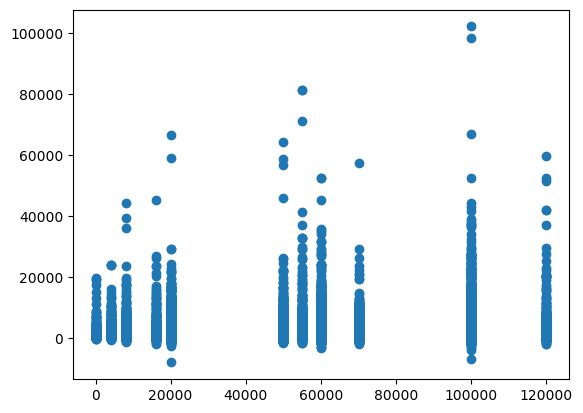

In [18]:
#plot the scatter plot of balance and salary variable in inp1 
plt.scatter(inp1.salary, inp1.balance) 
plt.show()


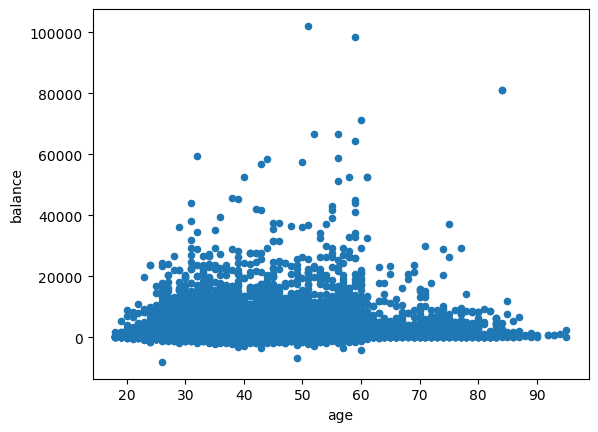

In [19]:
#plot the scatter plot of balance and age variable in inp1 
inp1.plot.scatter(x='age', y='balance') 
plt.show() 


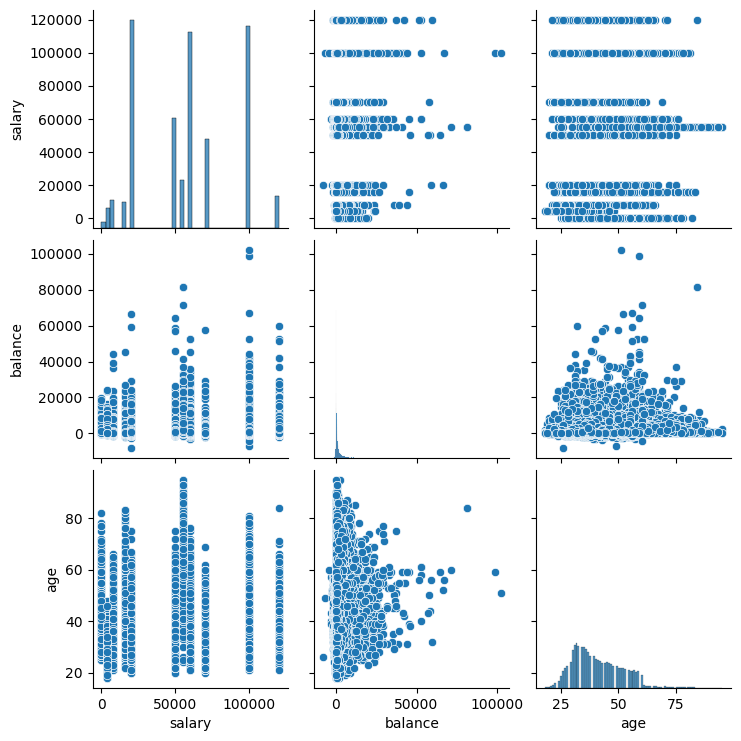

In [20]:
#plot the pair plot of salary, balance and age in inp1 dataframe. 
sns.pairplot(data=inp1, vars=["salary","balance", "age"])
plt.show()

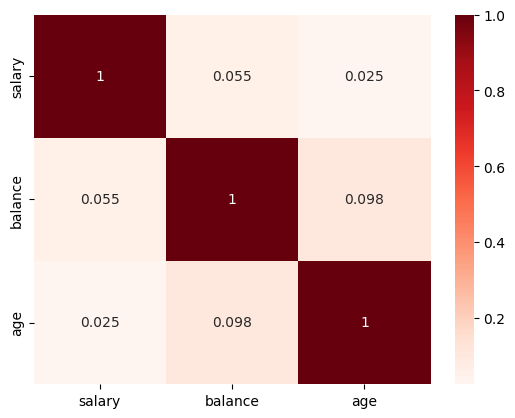

In [21]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe. 
sns.heatmap( inp1[["salary","balance", "age"]].corr(), annot= True, cmap= "Reds") 
plt.show() 


In [22]:
#groupby the response to find the mean of the salary with response no & yes seperatly. 
inp1.groupby("response")["salary"].mean() 


response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [23]:
#groupby the response to find the median of the salary with response no & yes seperatly. 
inp1.groupby("response")["salary"].median()


response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

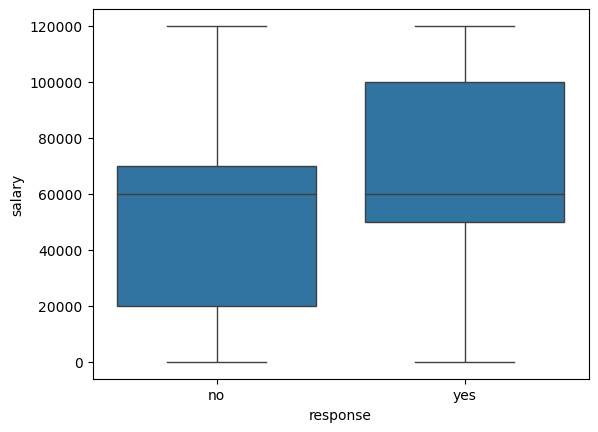

In [24]:
#plot the box plot of salary for yes & no responses. 
sns.boxplot(data=inp1,x="response", y="salary") 
plt.show() 


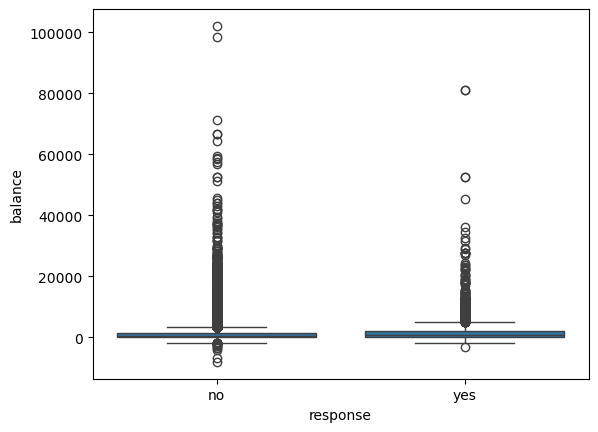

In [25]:
#plot the box plot of balance for yes & no responses. 
sns.boxplot(data=inp1,x="response", y="balance") 
plt.show() 


In [26]:
#groupby the response to find the mean of the balance with response no & yes seperatly. 
inp1.groupby("response")["balance"].mean()


response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [27]:
#groupby the response to find the median of the balance with response no & yes seperatly. 
inp1.groupby("response")["balance"].median()


response
no     417.0
yes    733.0
Name: balance, dtype: float64

In [29]:
#function to find the 75th percentile. 
def p75(x): 
    return np.quantile(x, 0.75) 
#calculate the mean, median and 75th percentile of balance with response 
inp1.groupby("response")["balance"].aggregate(["mean","median",p75]) 
#plot the bar graph of balance's mean an median with response. inp1.groupby("response")


,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


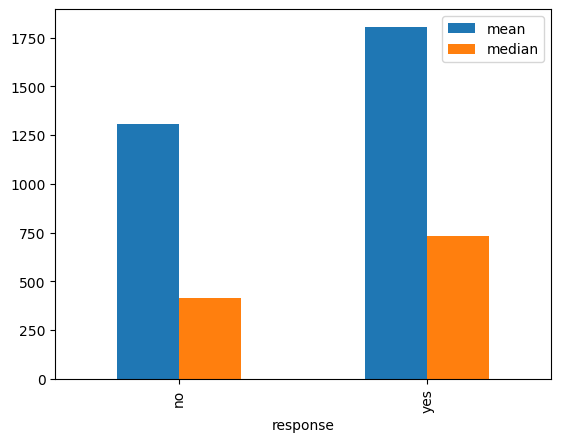

In [31]:
#plot the bar graph of balance's mean an median with response. 
inp1.groupby("response")["balance"].aggregate(["mean","median"]).plot.bar() 
plt.show() 


In [32]:
#groupby the education to find the mean of the salary education category. 
inp1.groupby("education")["salary"].mean() 


education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [33]:
#groupby the education to find the median of the salary for each education category. 
inp1.groupby("education")["salary"].median()


education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

In [34]:
#groupby the job to find the mean of the salary for each job category. 
inp1.groupby('job')['salary'].mean() 
inp1.groupby('job')['salary'].median()


job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

In [36]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0 
inp1["response_flag"]=np.where(inp1.response=="yes", 1, 0) 
inp1.response.value_counts() 
inp1.response.value_counts(normalize= True) 
inp1.response_flag.mean() 


np.float64(0.1170257523084077)

In [37]:
#Education vs response rate 
#calculate the mean of response_flag with different education categories. 
inp1.groupby("education")["response_flag"].mean() 


education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

In [38]:
#Marital vs response rate 
#calculate the mean of response_flag with different marital status categories. 
inp1.groupby(["marital"])["response_flag"].mean()


marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

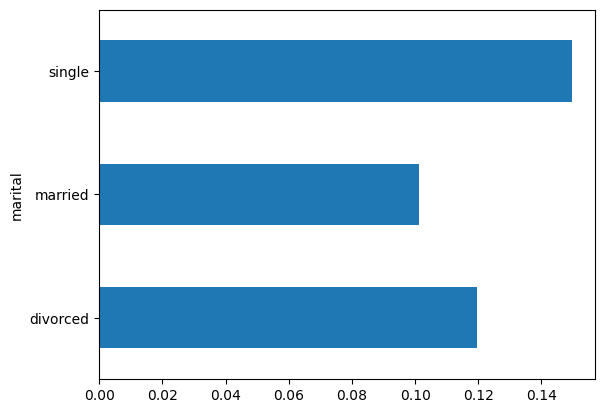

In [40]:
#plot the bar graph of marital status with average value of response_flag 
inp1.groupby(["marital"])["response_flag"].mean().plot.barh()
plt.show()


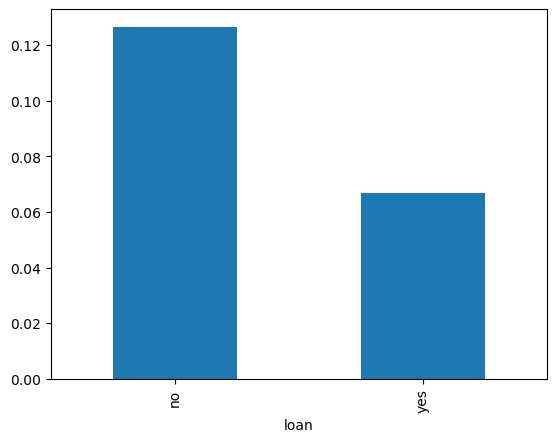

In [42]:
#Loans vs response rate 
#plot the bar graph of personal loan status with average value of response_flag 
inp1.groupby(["loan"])["response_flag"].mean().plot.bar() 
plt.show()


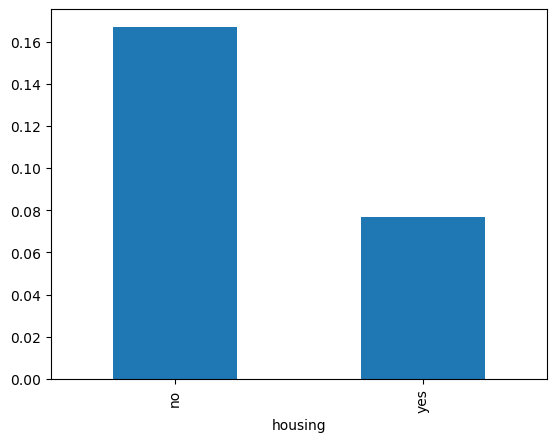

In [43]:
#Housing loans vs response rate 
#plot the bar graph of housing loan status with average value of response_flag 
inp1.groupby(["housing"])["response_flag"].mean().plot.bar() 
plt.show()


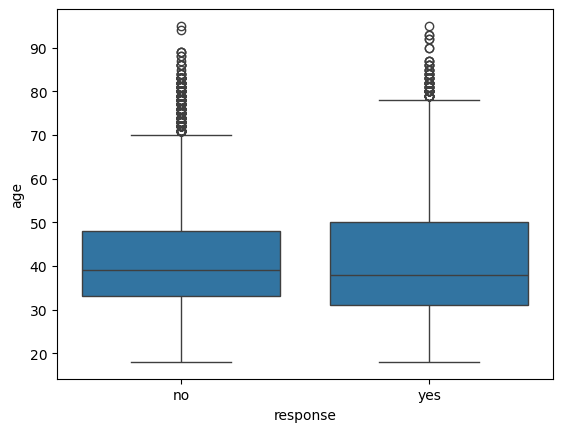

In [44]:
#Age vs response 
#plot the boxplot of age with response_flag 
sns.boxplot(data=inp1, x="response",y="age") 
plt.show()


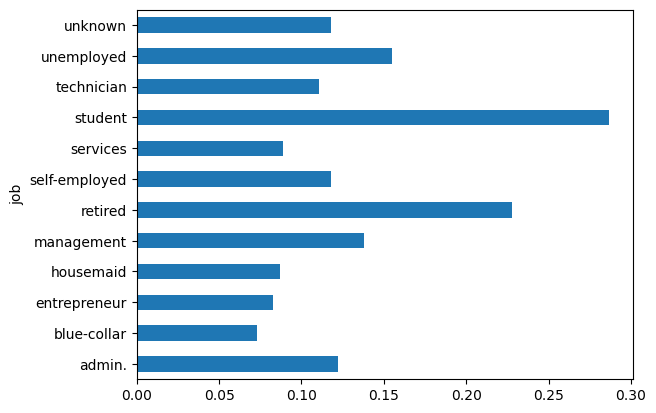

In [45]:
#plot the bar graph of job categories with response_flag mean value. 
inp1.groupby(['job'])['response_flag'].mean().plot.barh() 
plt.show()
